In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn_extra.cluster import KMedoids

In [4]:
iris = load_iris()
X = iris.data
y = iris.target

In [5]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [6]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

In [7]:
Z = linkage(X_scaled, method='ward')

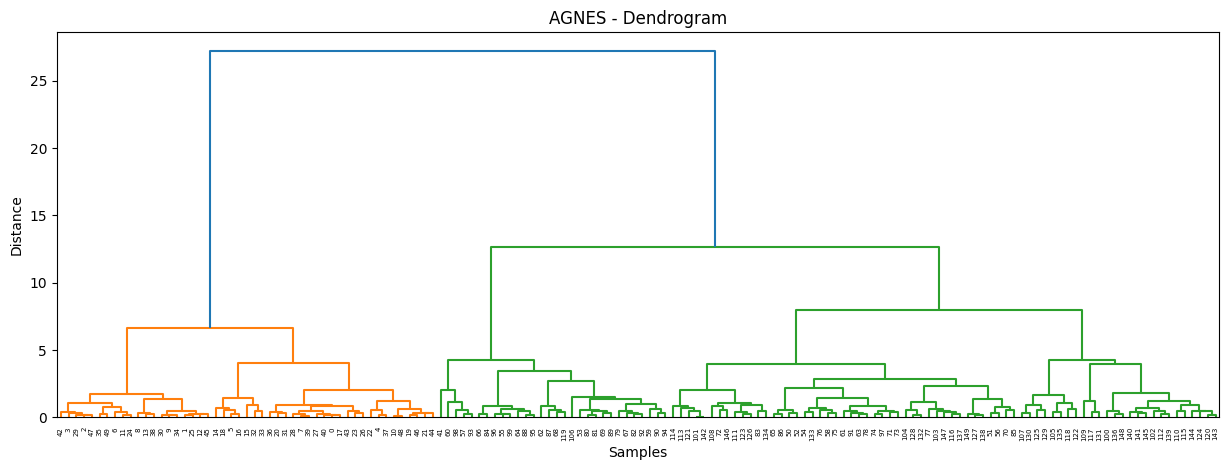

In [8]:
plt.figure(figsize=(15, 5))
dendrogram(Z)
plt.title("AGNES - Dendrogram")
plt.xlabel("Samples")
plt.ylabel("Distance")
plt.show()

In [9]:
agnes_labels = fcluster(Z, 3, criterion='maxclust')

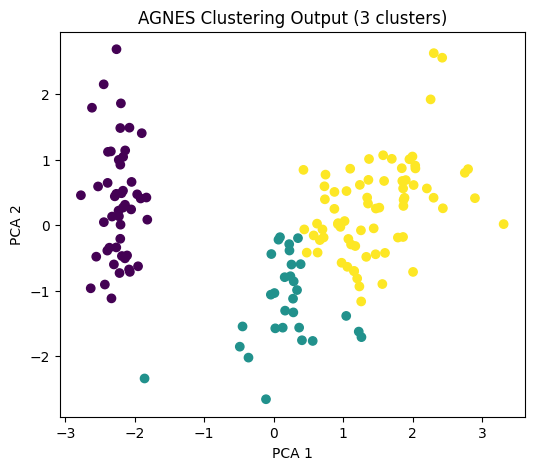

In [10]:
plt.figure(figsize=(6, 5))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=agnes_labels, cmap='viridis')
plt.title("AGNES Clustering Output (3 clusters)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.show()


In [11]:
def diana_recursive(X, max_clusters=3):
    clusters = {0: X}
    labels = np.zeros(len(X), dtype=int)
    current_cluster = 0
    next_label = 1

    while len(clusters) < max_clusters:
        to_split = max(clusters, key=lambda k: len(clusters[k]))
        subset = clusters.pop(to_split)

        if len(subset) <= 1:
            clusters[to_split] = subset
            continue

        kmedoids = KMedoids(n_clusters=2, random_state=42).fit(subset)
        split_labels = kmedoids.labels_

        indices = np.where(labels == to_split)[0]
        for i, label in zip(indices, split_labels):
            if label == 0:
                labels[i] = to_split
            else:
                labels[i] = next_label

        clusters[to_split] = subset[split_labels == 0]
        clusters[next_label] = subset[split_labels == 1]
        next_label += 1

    return labels

In [12]:
diana_labels = diana_recursive(X_scaled, max_clusters=3)

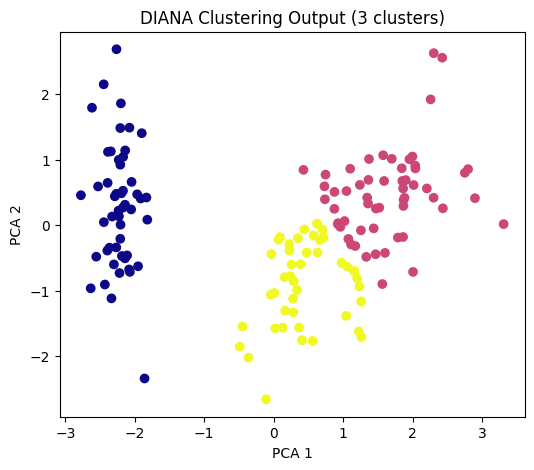

In [13]:
plt.figure(figsize=(6, 5))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=diana_labels, cmap='plasma')
plt.title("DIANA Clustering Output (3 clusters)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.show()